In [49]:
import pandas as pd

In [50]:
# Load the dataset
df = pd.read_csv('/content/shopping_trends.csv')

In [51]:
# Display the first few rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [52]:
# Getting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [53]:
# Summary statistics for numerical columns
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [54]:
# Check for missing values
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [55]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

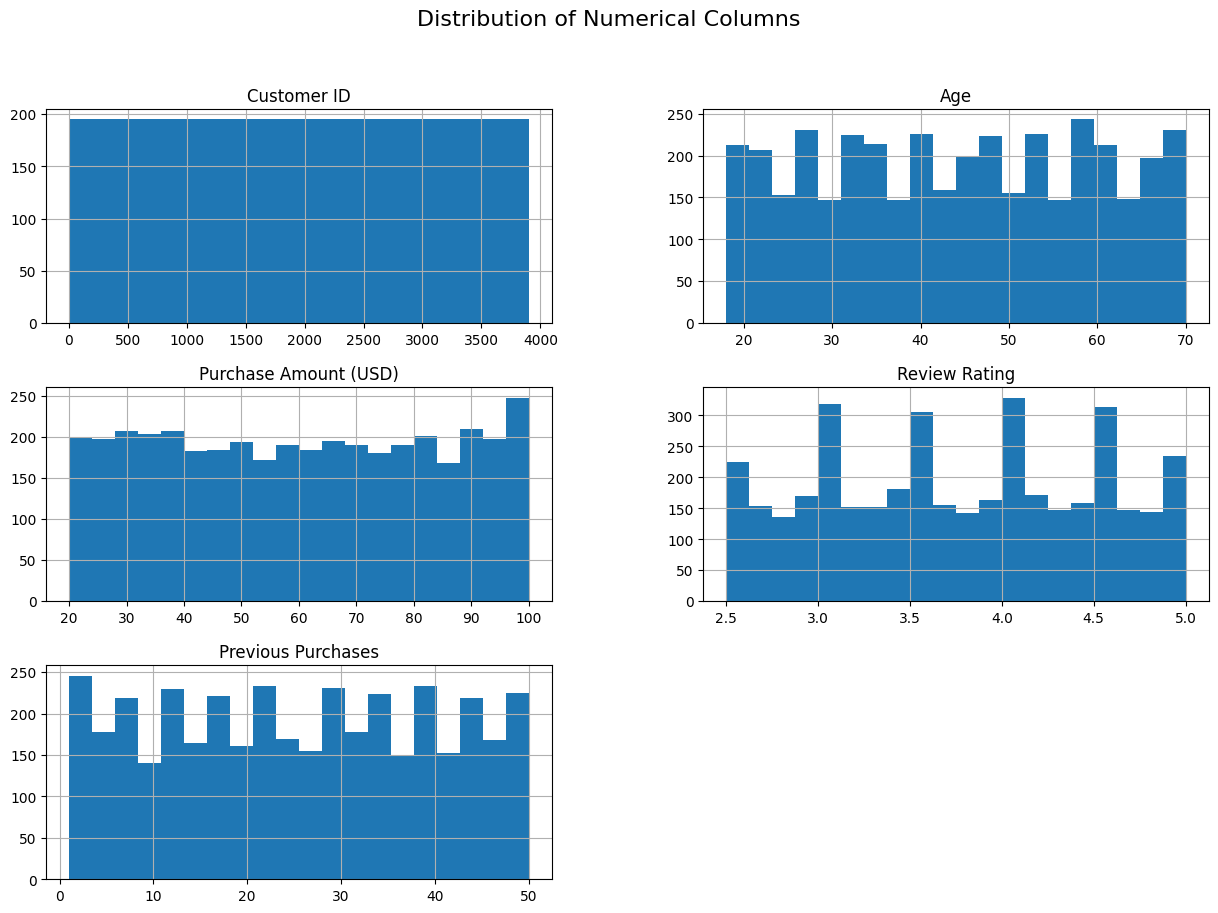

In [57]:
# Histogram for numerical columns
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.xlabel("Value Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

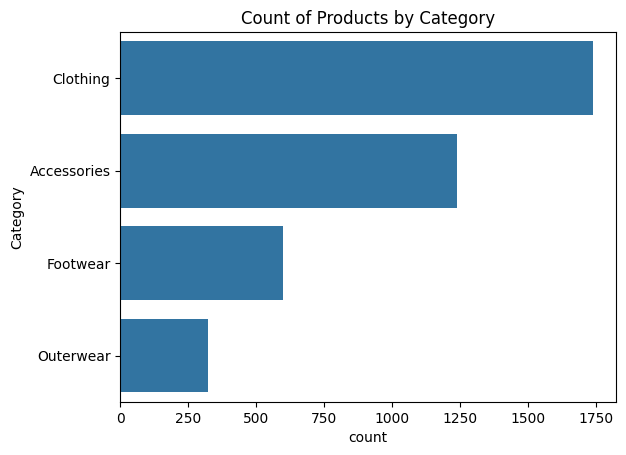

In [58]:
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title("Count of Products by Category")
plt.show()


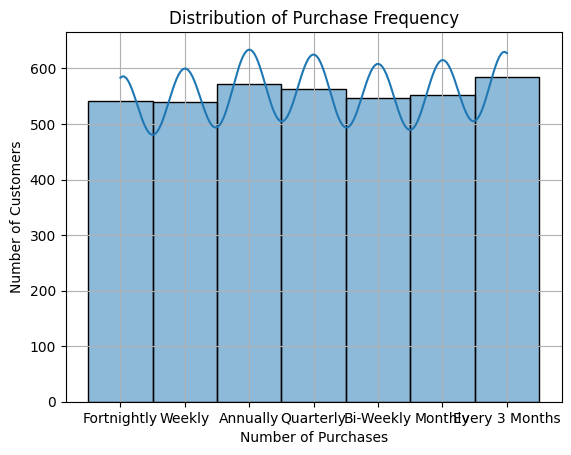

In [59]:
# Check the distribution of purchase frequency
plt.figure(figure=(10,6))
sns.histplot(df['Frequency of Purchases'], bins=20, kde=True)
plt.title("Distribution of Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

In [60]:
# Top 10 high-frequency customers
top_customers = df.sort_values(by='Frequency of Purchases', ascending=False).head(10)
print("Top 10 High-Frequency Customers:")
print(top_customers[['Customer ID', 'Frequency of Purchases']])

Top 10 High-Frequency Customers:
      Customer ID Frequency of Purchases
3212         3213                 Weekly
2249         2250                 Weekly
658           659                 Weekly
659           660                 Weekly
2234         2235                 Weekly
1573         1574                 Weekly
3187         3188                 Weekly
3180         3181                 Weekly
671           672                 Weekly
2238         2239                 Weekly


In [61]:
# Group by season to get total purchase amount for each season
seasonal_sales = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

<ipython-input-62-4eaf2171f625>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Purchase Amount (USD)', data=seasonal_sales, palette='viridis')


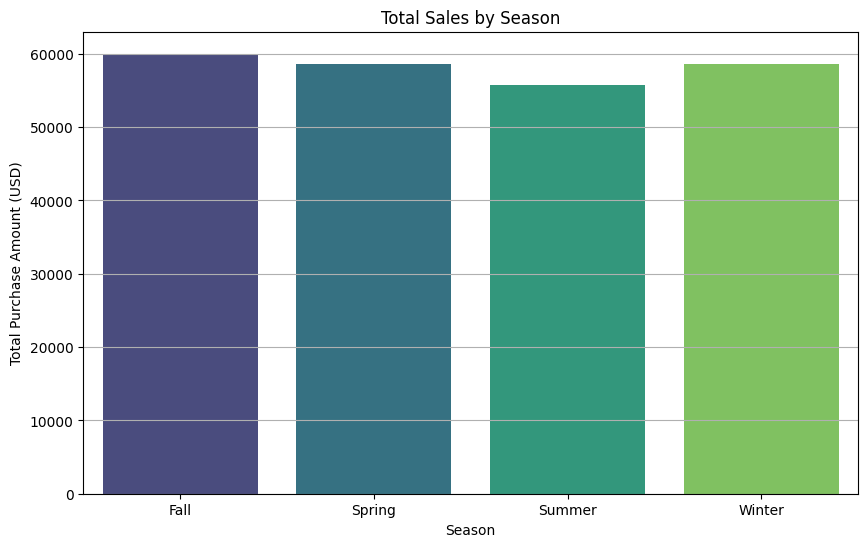

In [62]:
# Plot sales by season
plt.figure(figsize=(10,6))
sns.barplot(x='Season', y='Purchase Amount (USD)', data=seasonal_sales, palette='viridis')
plt.title("Total Sales by Season")
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount (USD)")
plt.grid(axis='y')
plt.show()

In [63]:
# Group by category to get total purchase amount for each category
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

<ipython-input-64-3679fec13b7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_sales, palette='magma')


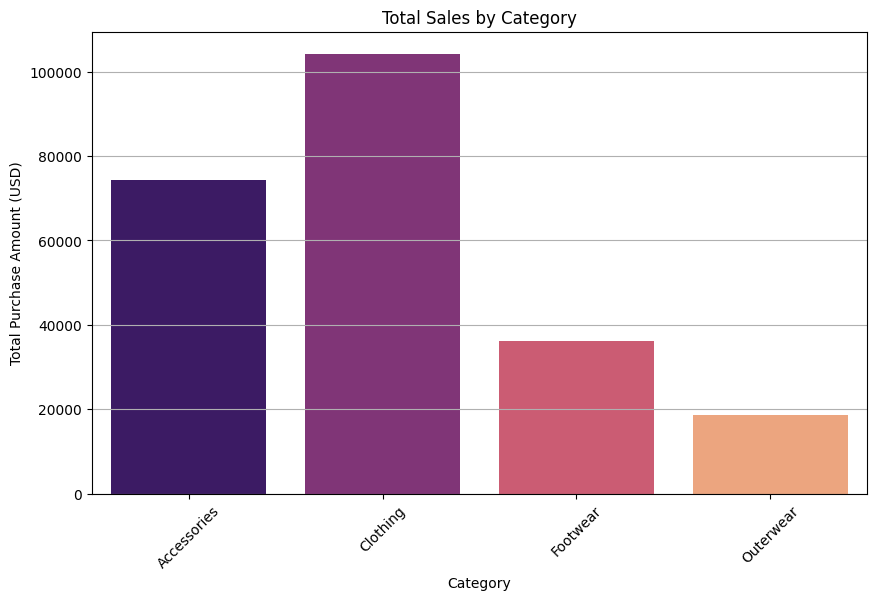

In [64]:
# Plot sales by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_sales, palette='magma')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [65]:
# Group by discount status to see total purchase amount with/without discounts
discount_sales = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

<ipython-input-66-bccee77325b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount Applied', y='Purchase Amount (USD)',data=discount_sales, palette='coolwarm')


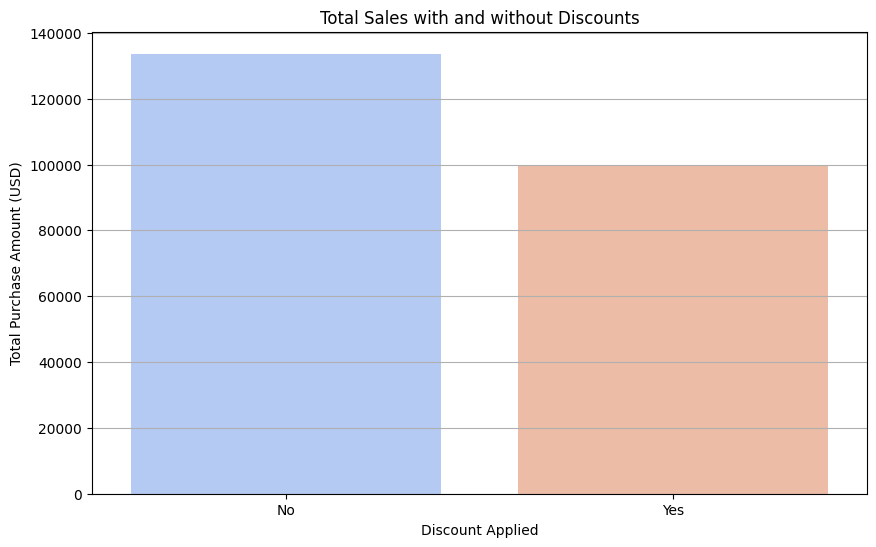

In [66]:
# Plot sales with and without discounts
plt.figure(figsize=(10,6))
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)',data=discount_sales, palette='coolwarm')
plt.title("Total Sales with and without Discounts")
plt.xlabel("Discount Applied")
plt.ylabel("Total Purchase Amount (USD)")
plt.grid(axis='y')
plt.show()


In [67]:
# Analyze sales with and without promo codes
promo_sales = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

<ipython-input-68-a27178d54b42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=promo_sales, palette='Set2')


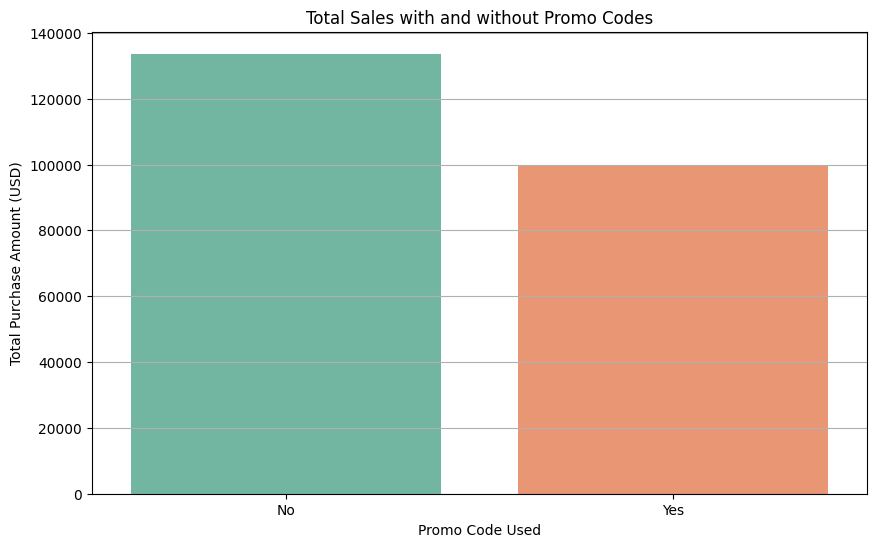

In [68]:
# Plot sales with and without promo sales
plt.figure(figsize=(10,6))
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=promo_sales, palette='Set2')
plt.title("Total Sales with and without Promo Codes")
plt.xlabel("Promo Code Used")
plt.ylabel("Total Purchase Amount (USD)")
plt.grid(axis='y')
plt.show()

In [69]:
# Group by product to get total sales per product
product_sales = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

In [70]:
# Sort products by sales in descending order
product_sales = product_sales.sort_values(by='Purchase Amount (USD)', ascending=False)

<ipython-input-71-07b8b7495f94>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=product_sales, palette='Blues_d')


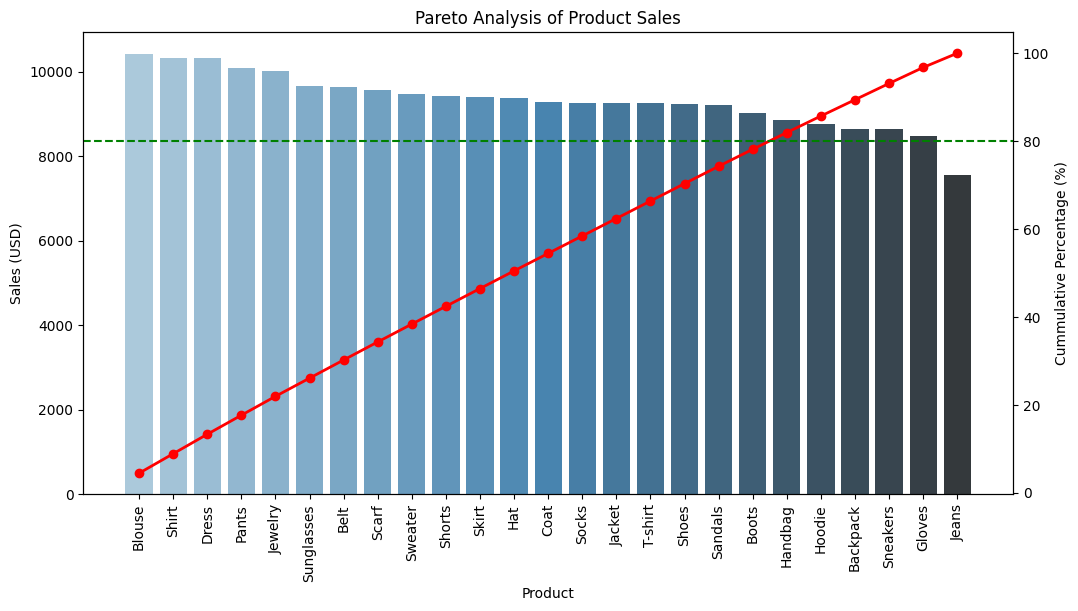

Products contributing to 80% of sales:
   Item Purchased  Purchase Amount (USD)  Cummulative Percentage
2          Blouse                  10410                4.466259
16          Shirt                  10332                8.899052
5           Dress                  10320               13.326698
13          Pants                  10090               17.655665
12        Jewelry                  10010               21.950309
22     Sunglasses                   9649               26.090072
1            Belt                   9635               30.223828
15          Scarf                   9561               34.325835
23        Sweater                   9462               38.385368
18         Shorts                   9433               42.432459
19          Skirt                   9402               46.466250
8             Hat                   9375               50.488457
4            Coat                   9275               54.467760
21          Socks                   9252           

In [71]:
# Calculate cumulative sales percentage
product_sales['Cummulative Sales'] = product_sales['Purchase Amount (USD)'].cumsum()
product_sales['Cummulative Percentage'] = (product_sales['Cummulative Sales'] / product_sales['Purchase Amount (USD)'].sum()) * 100

# Plot the Pareto chart
plt.figure(figsize=(12,6))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=product_sales, palette='Blues_d')
plt.xticks(rotation=90)
plt.ylabel("Sales (USD)")
plt.xlabel("Product")
plt.title("Pareto Analysis of Product Sales")

#Add a line plot for cummulative percentage
plt.twinx()
plt.plot(product_sales['Item Purchased'], product_sales['Cummulative Percentage'], color='red', marker='o', linewidth=2)
plt.axhline(80, color='green', linestyle='--')
plt.ylabel("Cummulative Percentage (%)")
plt.grid(False)
plt.show()

# Identify products contributing to 80% of sales
top_80_percentage = product_sales[product_sales['Cummulative Percentage'] <= 80]
print("Products contributing to 80% of sales:")
print(top_80_percentage[['Item Purchased', 'Purchase Amount (USD)', 'Cummulative Percentage']])

In [72]:
# Check columns in the dataset
df.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [73]:
# Drop rows with missing values in demographic columns
df_demographic = df.dropna(subset=['Age', 'Gender', 'Location'])


In [74]:
# One-hot encoding for Gender and Location
df_encoded = pd.get_dummies(df_demographic, columns=['Gender', 'Location'], drop_first=True)


In [75]:
from sklearn.preprocessing import StandardScaler

# Select features for demographic segmentation
demographic_features = ['Age'] + [col for col in df_encoded.columns if 'Gender' in col or 'Location' in col]

scaler = StandardScaler()
demographic_scaled = scaler.fit_transform(df_encoded[demographic_features])


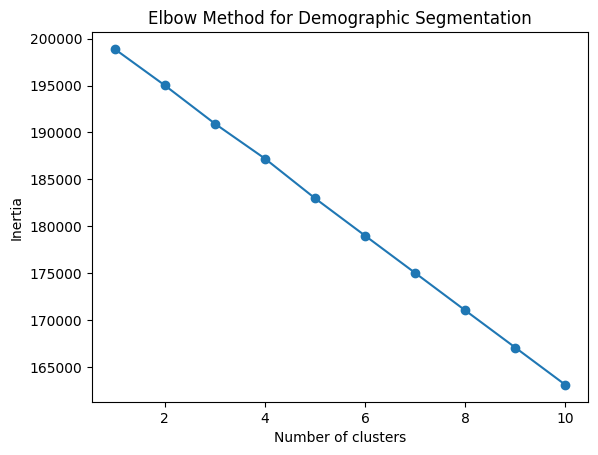

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(demographic_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Demographic Segmentation')
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_demographic['demographic_cluster'] = kmeans.fit_predict(demographic_scaled)


In [77]:
# One-hot encoding for Category, Subscription Status, and Preferred Payment Method
df_encoded_behavioral = pd.get_dummies(df,
                                        columns=['Category', 'Subscription Status', 'Preferred Payment Method'],
                                        drop_first=True)


In [78]:
# Define a mapping for frequency categories to numerical values (lower values for less frequent)
frequency_mapping = {
    'Daily': 30,           # 30 purchases per month
    'Weekly': 4,           # 4 purchases per month
    'Fortnightly': 2,      # 2 purchases per month
    'Monthly': 1           # 1 purchase per month
}

# Apply the mapping to the column
df_encoded_behavioral['Frequency of Purchases'] = df_encoded_behavioral['Frequency of Purchases'].map(frequency_mapping)


In [79]:
# Fix concatenated gender values by keeping only the first occurrence
df_encoded_behavioral['Gender'] = df_encoded_behavioral['Gender'].str[:4]  # 'Male' or 'Fema'


<Axes: xlabel='Age', ylabel='Purchase Amount (USD)'>

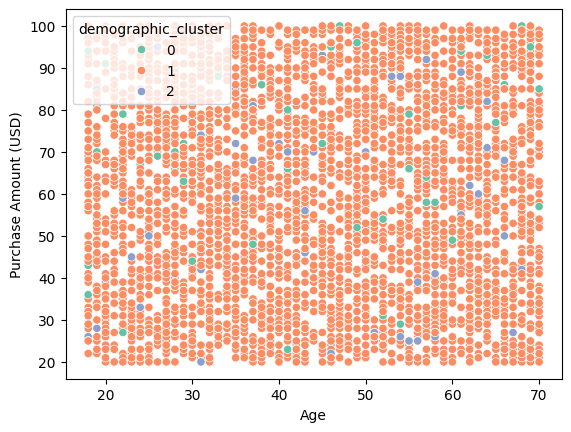

In [80]:
import seaborn as sns

# Example scatter plot for demographic clusters
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='demographic_cluster', data=df_demographic, palette='Set2')

